In [2]:
import pandas as pd #panel data 라이브러리
import numpy as np
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('C:/Users/1/Downloads/winequality-red.csv', delimiter=';')#구분자

In [5]:
'data', data.shape

('data', (1599, 12))

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data = np.array(data)
x = data[:, :-1]
y = data[:, [-1]]
scaler = MinMaxScaler().fit (x)#값을 [0,1] 로 정규화
x = scaler.transform(x)#값을 [0,1] 로 정규화
print(np.min(x), np.max(x))

0.0 1.0000000000000002


In [13]:
model = LinearRegression().fit(x, y)
score = model.score(x,y) #결정계수 R^2 1이 목표, 값이 작을 수록 예측이 나쁘다
'score', score

('score', 0.36055170303868833)

In [14]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
x = tf.cast(x, tf.float32)
y = tf.cast(y, tf.float32)
h = slim.fully_connected(x, 1) #weight 가 자동으로 생성됩니다
cost = tf.reduce_mean((h - y)**2)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W0729 17:25:12.943007 14616 deprecation.py:323] From C:\Users\1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
for i in range(200):
    sess.run(train)

In [26]:
print('h', sess.run(h), 'cost', sess.run(cost))

h [[5.090154 ]
 [5.0601892]
 [5.1439614]
 ...
 [5.8712907]
 [5.540783 ]
 [5.914328 ]] cost 0.42639047


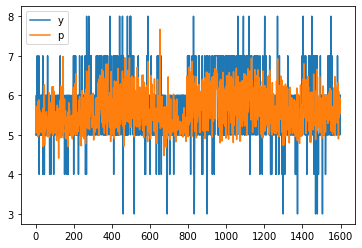

In [28]:
import matplotlib.pyplot as plt
predict = sess.run(h)
plt.plot(sess.run(y[:,0]), label='y')
plt.plot(predict[:,0], label='p')
plt.legend()#라벨,레이블 표시하기